# 1. Import Libraries

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

## 2. Load Data

In [122]:
# Define file path (update if necessary)
path = r'C:\Users\Jacques\OneDrive\Documents\Data Analytics course\Data Specialization\Part 1\Exercise 1.5'

In [124]:
# Load scaled climate dataset
climate = pd.read_csv(os.path.join(path, 'DataSet_scaled.csv'))

In [126]:
# Load pleasant weather answers
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [128]:
# Display first few rows to confirm successful loading
print(climate.head())
print(pleasantweather.head())

   id      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0   0  19600101      1           0.660514          -0.02793        0.826097   
1   1  19600102      1           0.244897          -0.02793        0.735760   
2   2  19600103      1           1.076130          -0.02793        1.277781   
3   3  19600104      1          -1.001953          -0.02793        1.458455   
4   4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0         -0.179228  ...             -0.443701           0.

## 3. Data Cleaning and Manipulation

In [137]:
# Drop stations with insufficient data (Gdansk, Roma, Tours) and unnecessary columns
cols_to_drop = [
    'GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation',
    'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
    'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure',
    'ROMA_sunshine', 'ROMA_temp_mean', 'TOURS_wind_speed', 'TOURS_humidity',
    'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation',
    'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max', 'Unnamed: 0'
]

In [139]:
# Keep only columns that exist
cols_to_drop = [col for col in cols_to_drop if col in climate.columns]

In [141]:
# Drop the columns
activedf = climate.drop(columns=cols_to_drop)

In [143]:
# Create features X and target y
X = activedf.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [145]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [147]:
# Optionally convert to numpy arrays if needed by models
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

In [149]:
print("Training and Testing Shapes:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Training and Testing Shapes:
(17212, 148) (5738, 148) (17212, 15) (5738, 15)


## 4. Decision Tree Model

In [152]:
# Initialize Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', min_samples_split=2)

In [154]:
# Train the model
dt_model.fit(X_train_np, y_train)

DecisionTreeClassifier()

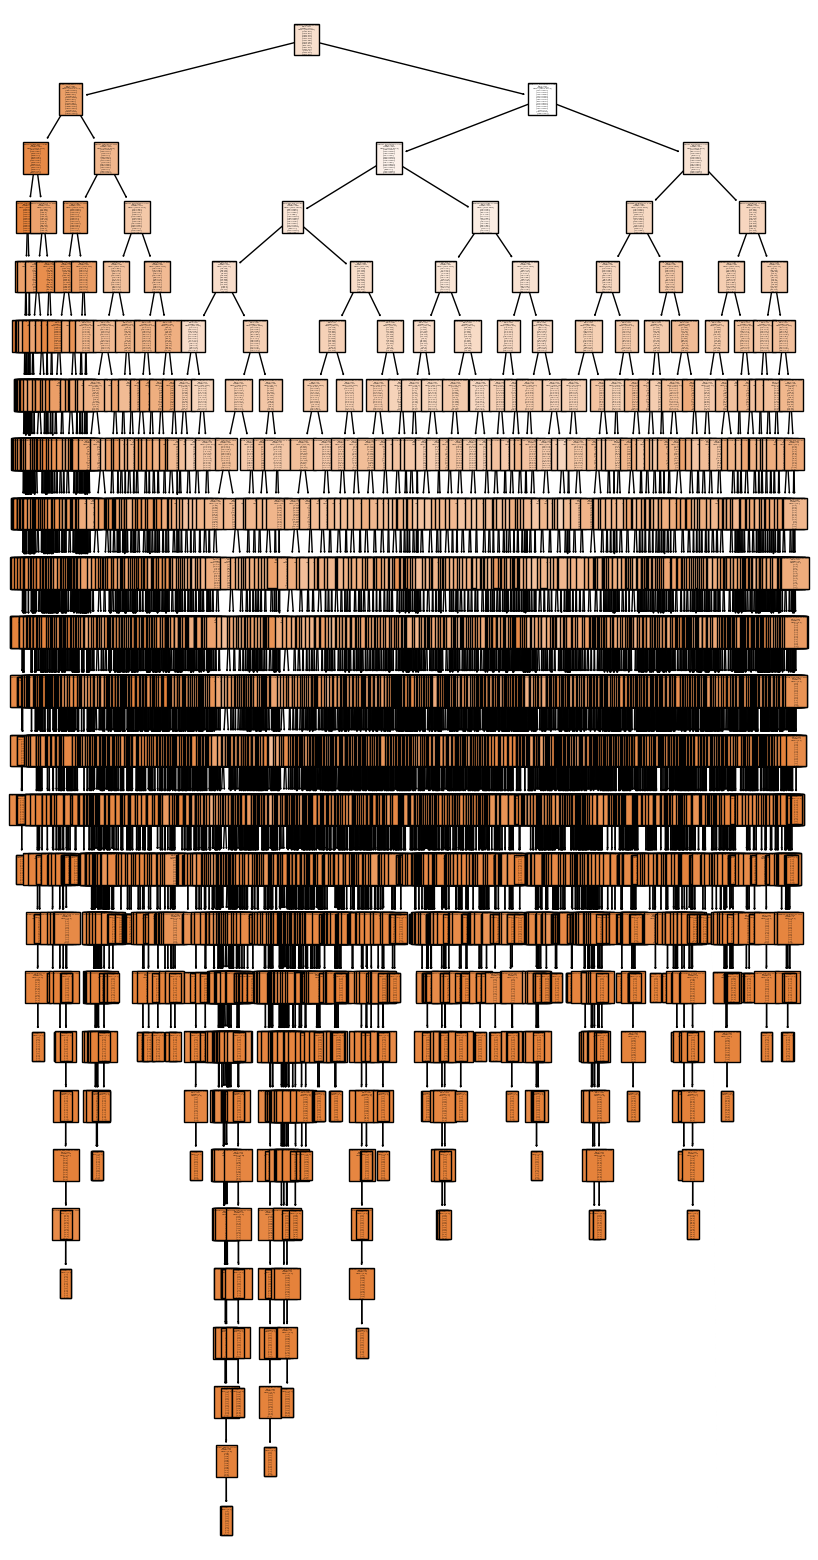

In [156]:
# Plot the tree 
plt.figure(figsize=(10,20))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.show()

In [158]:
# Predict on training set for evaluation
y_pred_train = dt_model.predict(X_train_np)

In [160]:
# Cross-validated training accuracy
train_acc = cross_val_score(dt_model, X_train_np, y_train, cv=3, scoring='accuracy').mean()
print(f"Decision Tree Training Accuracy (CV): {train_acc:.4f}")

Decision Tree Training Accuracy (CV): 0.6035


In [162]:
# Classification report for training set
report = classification_report(y_train, y_pred_train, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4264
           1       1.00      1.00      1.00      6030
           2       1.00      1.00      1.00      5593
           3       1.00      1.00      1.00      3358
           4       1.00      1.00      1.00      3703
           5       1.00      1.00      1.00      3791
           6       1.00      1.00      1.00      2851
           7       1.00      1.00      1.00      4833
           8       1.00      1.00      1.00      3590
           9       1.00      1.00      1.00      7677
          10       1.00      1.00      1.00      3575
          11       1.00      1.00      1.00      2720
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2922
          14       1.00      1.00      1.00       898

   micro avg       1.00      1.00      1.00     55805
   macro avg       0.93      0.93      0.93     55805
weighted avg       1.00   

## 5. Multi-Station Confusion Matrices

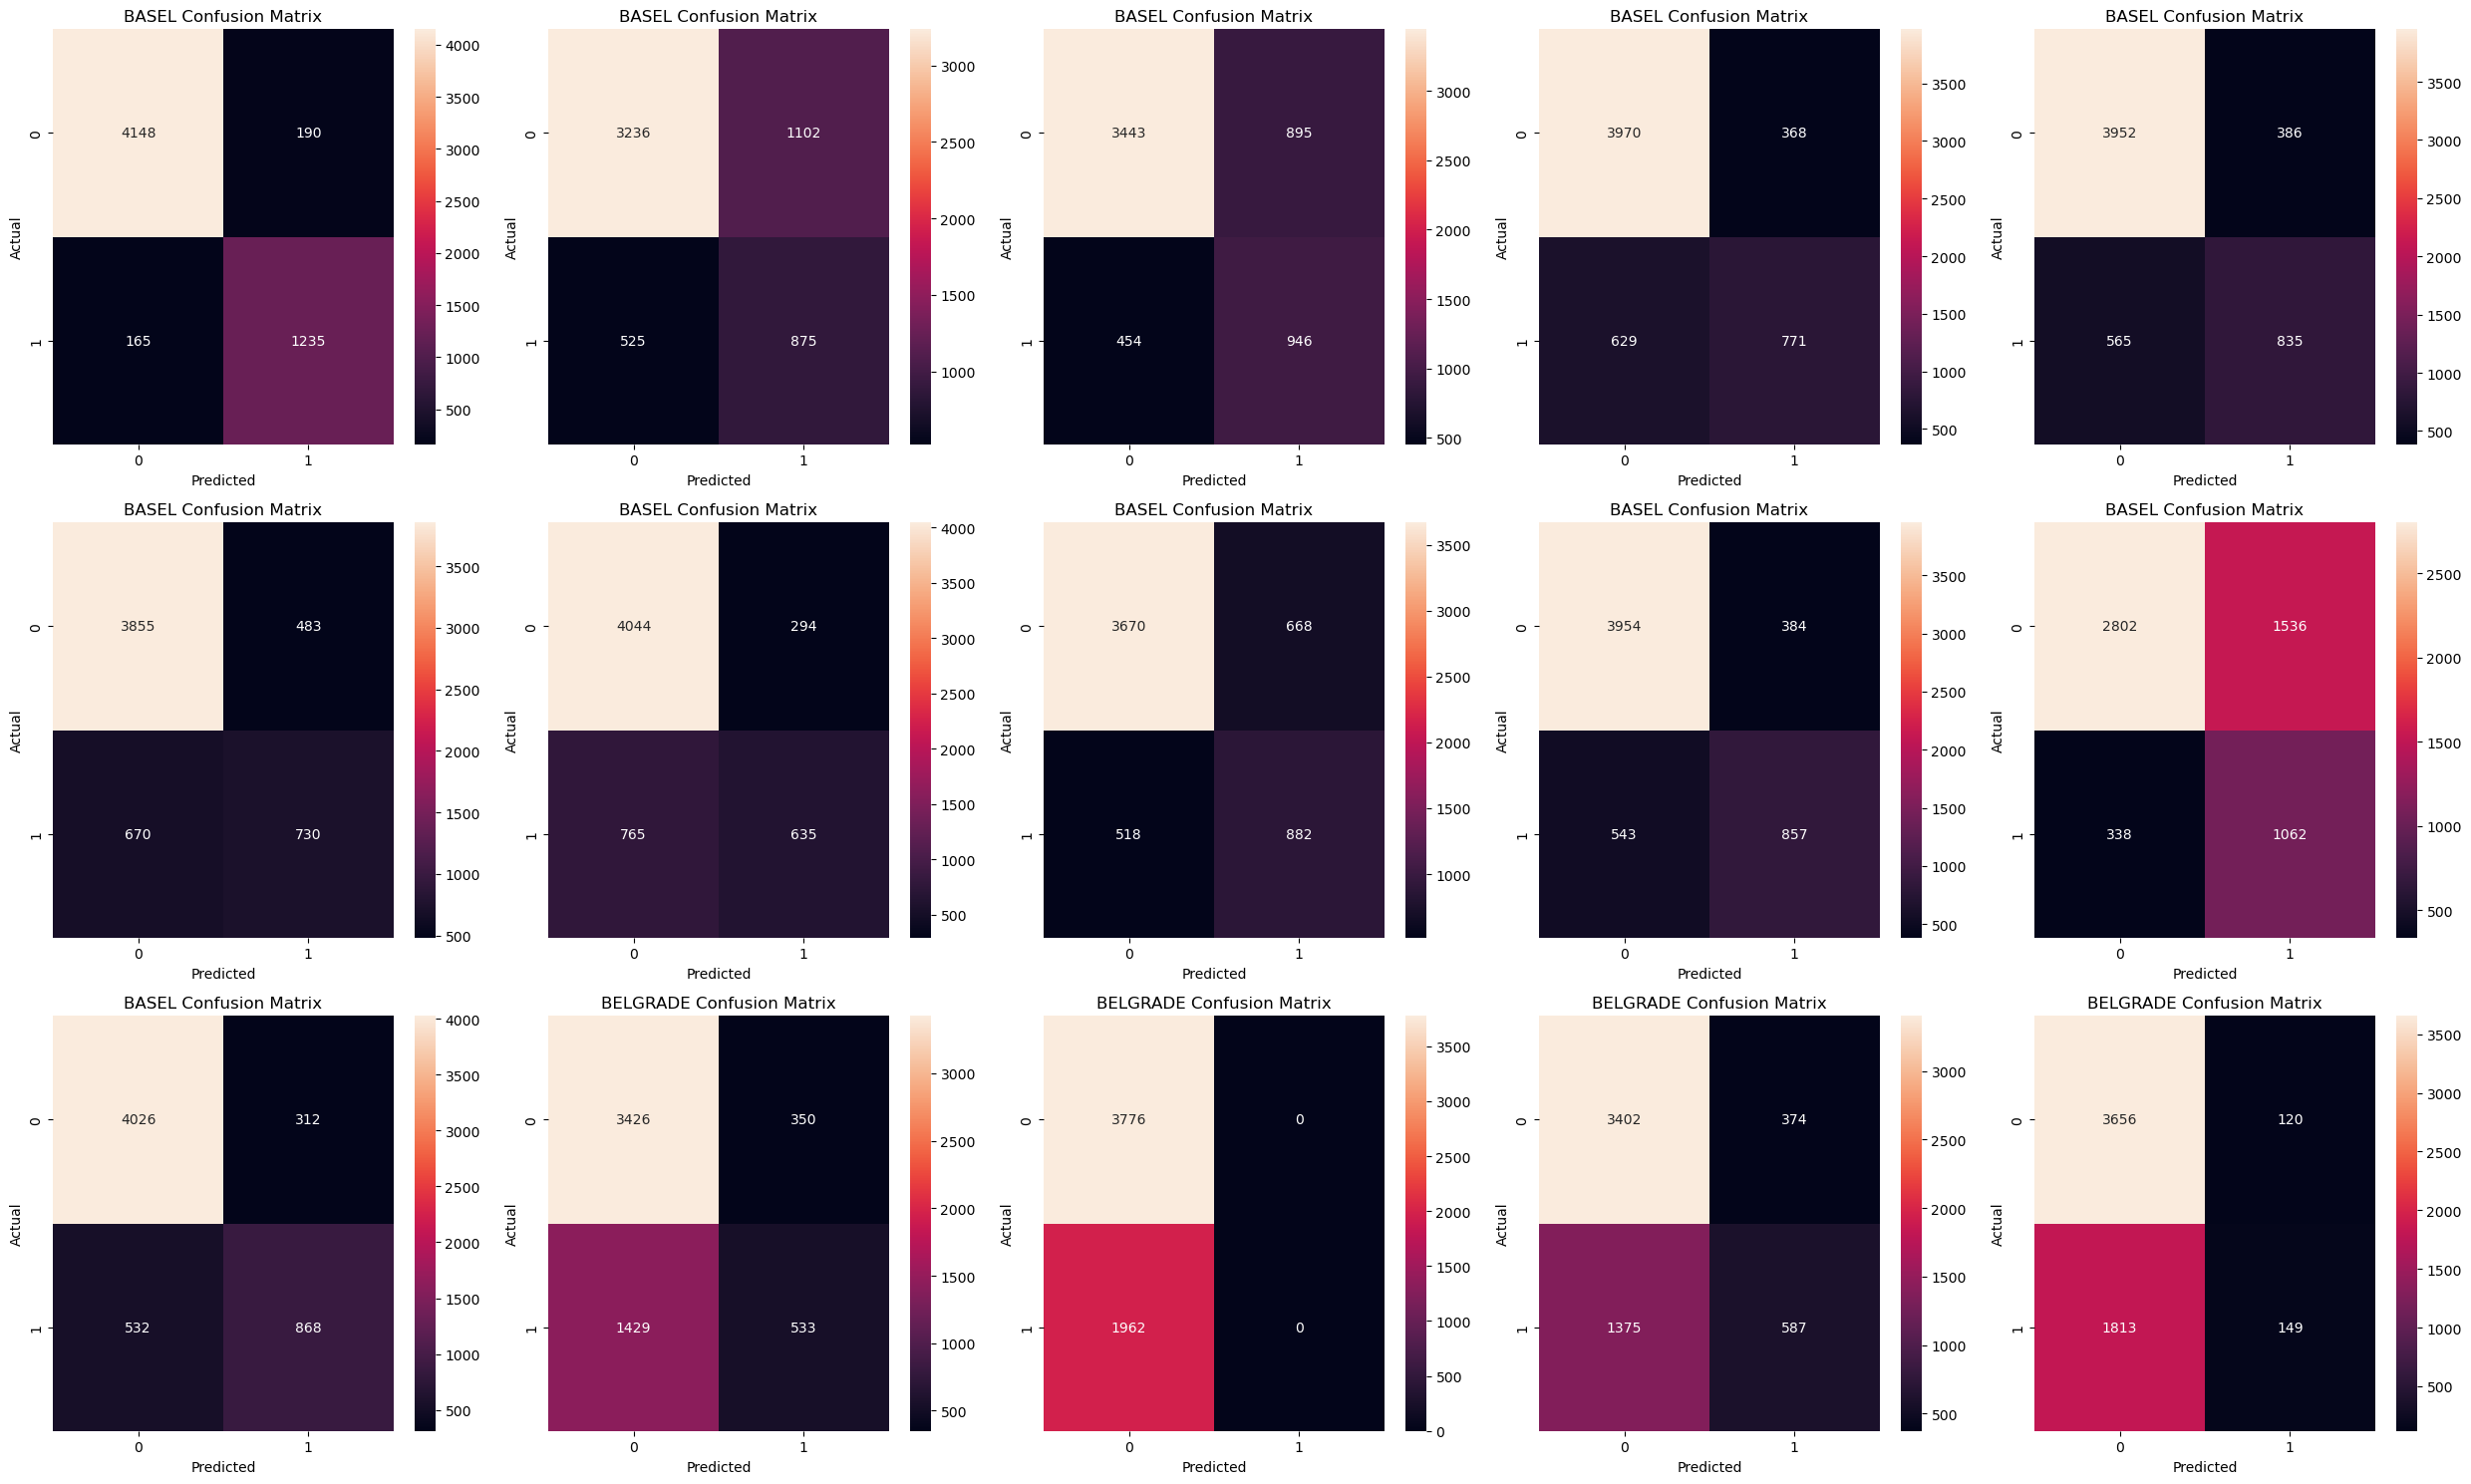

In [165]:
locations = sorted([x.split("_")[0] for x in activedf.columns if x not in ['DATE','MONTH']])
key = "_pleasant_weather"

fig, axes = plt.subplots(3, 5, figsize=(25,15))
count = 0
labels = ['pleasant', 'unpleasant']

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[name + key], dt_model.predict(X_test_np)[:, count], labels=[0,1])
        sns.heatmap(cm, annot=True, fmt='g', ax=axes[i,j])
        axes[i,j].set_title(f"{name} Confusion Matrix")
        axes[i,j].set_xlabel("Predicted")
        axes[i,j].set_ylabel("Actual")
        count += 1
plt.tight_layout()
plt.show()

In [169]:
print(len(locations))
print(y_test.shape)
print(dt_model.predict(X_test_np).shape)

148
(5738, 15)
(5738, 15)


In [171]:
# Keep only stations that actually exist in y_test
locations = [loc for loc in locations if loc + key in y_test.columns]

In [179]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier

# Wrap the DT in MultiOutputClassifier
dt_model = MultiOutputClassifier(DecisionTreeClassifier(criterion='gini', min_samples_split=2))
dt_model.fit(X_train, y_train)  # keep X_train as DataFrame

# Predictions
y_pred = dt_model.predict(X_test)  # use DataFrame, not NumPy

# Make sure locations match y_test columns
locations = [loc for loc in locations if loc + key in y_test.columns]
locations = locations[:y_pred.shape[1]]  # ensure alignment

# Accuracy per station
accuracy_dict = {}
for idx, name in enumerate(locations):
    y_true = y_test[name + key]
    y_pred_station = y_pred[:, idx]
    accuracy_dict[name] = round(accuracy_score(y_true, y_pred_station) * 100)

for station, acc in accuracy_dict.items():
    print(f"{station}: {acc}%")

print(f"\nAverage Accuracy Across All Stations: {round(np.mean(list(accuracy_dict.values())))}%")

BASEL: 86%
BELGRADE: 66%

Average Accuracy Across All Stations: 76%


In [181]:
## 6. Artificial Neural Network (ANN) Framework

In [183]:
# Optional: scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [185]:
# Initialize ANN classifier (MLP)
ann_model = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, tol=1e-4, random_state=42)

In [187]:
# Train ANN
ann_model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)

In [189]:
# Predict on training set
y_pred_ann = ann_model.predict(X_train_scaled)

In [191]:
# Training accuracy
train_acc_ann = ann_model.score(X_train_scaled, y_train)
print(f"ANN Training Accuracy: {train_acc_ann:.4f}")

ANN Training Accuracy: 0.7501


In [193]:
# Classification report for ANN
report_ann = classification_report(y_train, y_pred_ann, zero_division=0)
print(report_ann)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4264
           1       0.97      0.98      0.97      6030
           2       0.95      0.99      0.97      5593
           3       0.93      0.90      0.92      3358
           4       0.94      0.96      0.95      3703
           5       0.88      0.98      0.93      3791
           6       0.92      0.92      0.92      2851
           7       0.92      0.97      0.94      4833
           8       0.97      0.91      0.94      3590
           9       0.98      1.00      0.99      7677
          10       0.86      1.00      0.92      3575
          11       0.90      0.91      0.91      2720
          12       0.00      0.00      0.00         0
          13       0.96      0.92      0.94      2922
          14       0.84      0.80      0.82       898

   micro avg       0.94      0.96      0.95     55805
   macro avg       0.86      0.88      0.87     55805
weighted avg       0.94   